In [2]:
import numpy as np
import xarray as xr
from math import *
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import xsimlab as xs
from scipy.stats import norm

### Main parameters

In [3]:
#Main parameters
d2s=86400 #24h in s
h2s=3600  #1h in s
w2=2*np.pi/(12*3600) #wave pulsation
km=1e3
dt=1*h2s # model step
L=100*km
k2=2*np.pi/L

um=0.1
uw=0.1
w=w2
k=k2


### Add trajectories on velocity fieldvelocity 

#### Trajectories for several particules

In [3]:
x=sti.SetUp(advected=0)

In [4]:
x.out_ds

<xarray.Dataset>
Dimensions:             (a: 100, otime: 143, time: 144)
Coordinates:
  * a                   (a) float64 0.0 2.02e+03 4.04e+03 ... 1.98e+05 2e+05
  * otime               (otime) int64 0 3600 7200 10800 ... 504000 507600 511200
  * time                (time) int64 0 3600 7200 10800 ... 507600 511200 514800
    otime_day           (otime) float64 0.0 0.04167 0.08333 ... 5.875 5.917
Data variables:
    init__N             int64 100
    init__maxi          float64 2e+05
    init__mini          int64 0
    position__p         (otime, a) float64 0.0 2.02e+03 ... 2.51e+05 2.532e+05
    velocity__advected  int64 0
    velocity__k         float64 6.283e-05
    velocity__um        float64 0.1
    velocity__uw        float64 0.1
    velocity__v         (otime, a) float64 0.2 0.1992 0.1968 ... 0.05568 0.06803
    velocity__w         float64 0.0001454
    position_km         (otime, a) float64 0.0 2.02 4.04 ... 248.9 251.0 253.2
    displacement        (otime, a) float64 0.0 0.0 0.0 ... 5.305e+04 5.315e+04

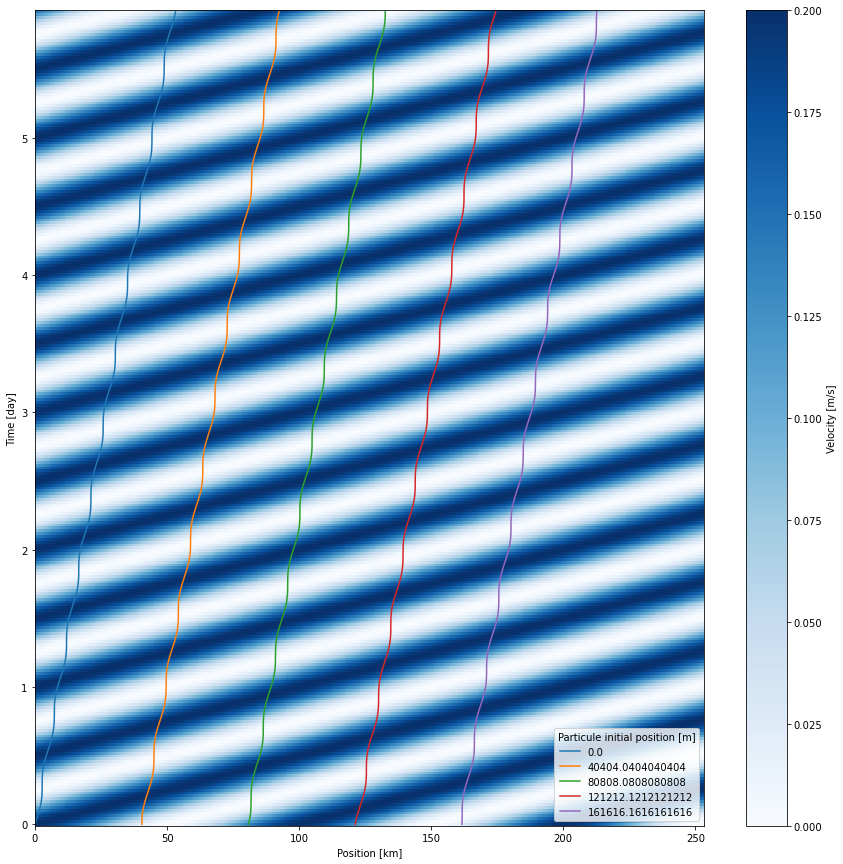

In [5]:
x.velocity_field().plot(y='t', figsize=(15,15), cmap='Blues')
x.out_ds.position_km.isel(a=slice(0,None,20)).plot(y='otime_day', hue='a')

#### Trajectories for different integration methods

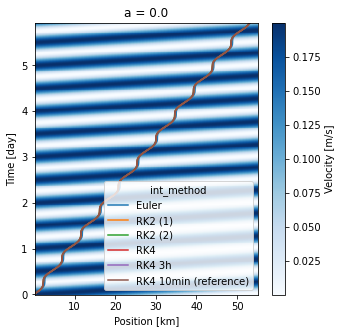

In [6]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=x.velocity_field()
vf=vf.where(vf.x.where(vf.x<55,  drop=True)>0, drop=True)
fg=vf.plot(y='t',figsize=(5,5), cmap='Blues')
compx.ds.position_km.isel(a=0).plot(y="otime_day",hue="int_method", ax=fg.axes)


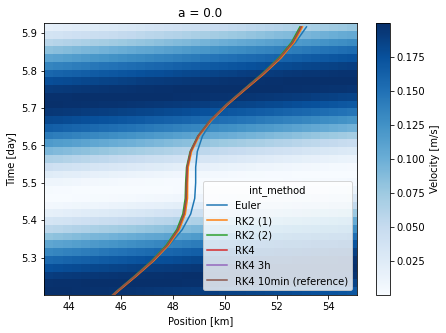

In [7]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=vf.where(vf.t>5.2, drop=True).where(vf.x.where(vf.x<55,  drop=True)>43, drop=True)
fg=vf.plot(y='t',figsize=(7,5), cmap='Blues')
compx.ds.position_km.isel(a=0).plot(y="otime_day",hue="int_method", ax=fg.axes)


# Unadvected Case
## Integration method dependency

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


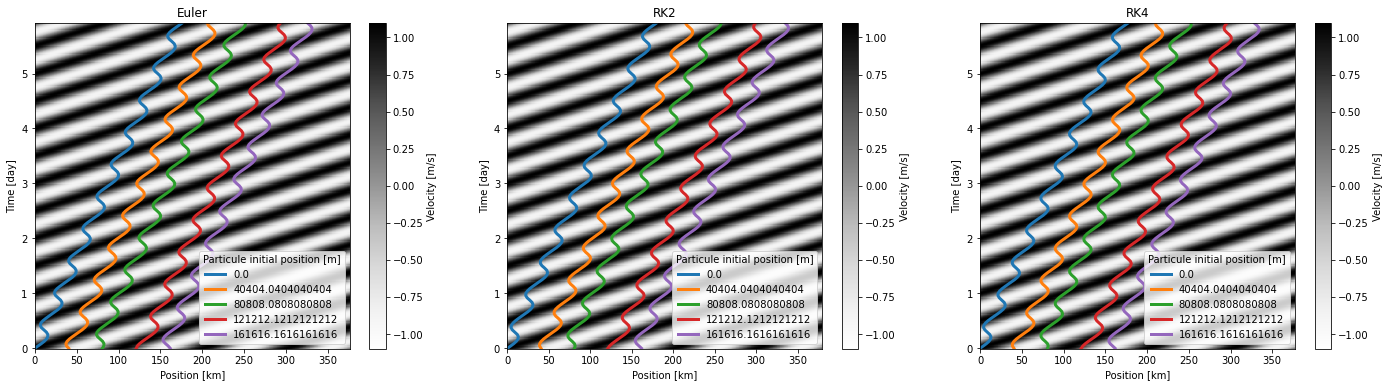

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(24,6))
y=sti.SetUp(advected=0, uw=1)
y.velocity_field().plot(y='t', cmap='Greys', ax=axes[0])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[0],lw=3)
axes[0].title.set_text('Euler')

y.update_intmethod(sti.Runge_Kutta2)
y.velocity_field().plot(y='t',cmap='Greys', ax=axes[1])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[1],lw=3)
axes[1].title.set_text('RK2')

y.update_intmethod(sti.Runge_Kutta4)
y.velocity_field().plot(y='t', cmap='Greys', ax=axes[2])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[2],lw=3)
axes[2].title.set_text('RK4')

* Because of the error estimation study we will use RK4

## Dependency to parameters
### Dependency to mean velocity um

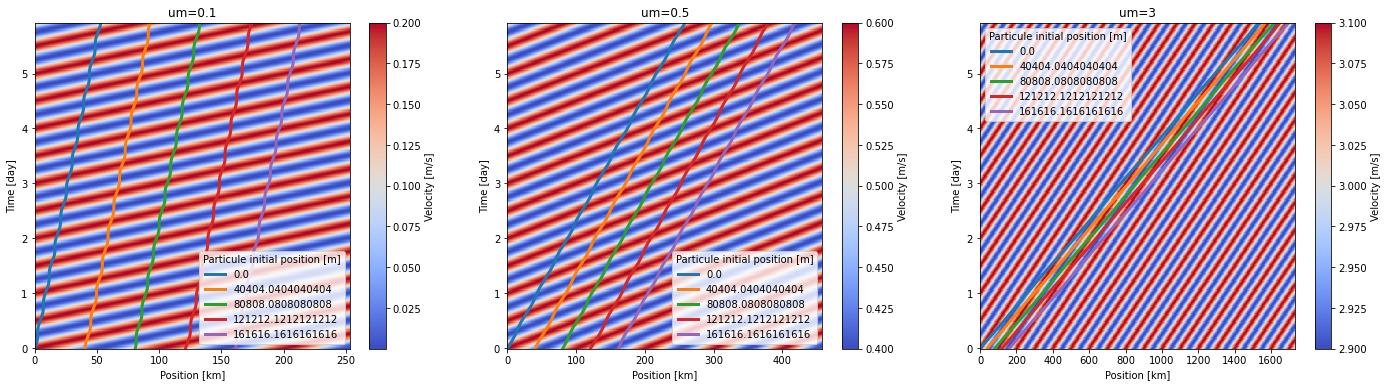

In [27]:
Um=[0.1,0.5, 3]
l=len(Um)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta4)

for i in range(l):
    y.update_parameters(velocity__um=Um[i])
    y.velocity_field().plot(y='t',cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('um='+str(Um[i]))


### Dependency on wave velocity uw

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


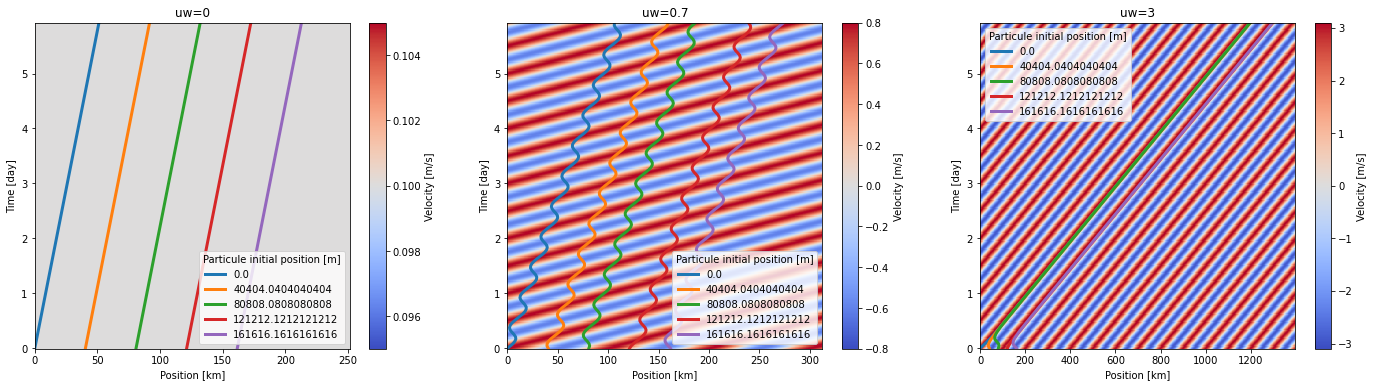

In [31]:
Uw=[0,0.7,3]
l=len(Uw)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__uw=Uw[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('uw='+str(Uw[i]))

### Dependency on wave vector k 

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


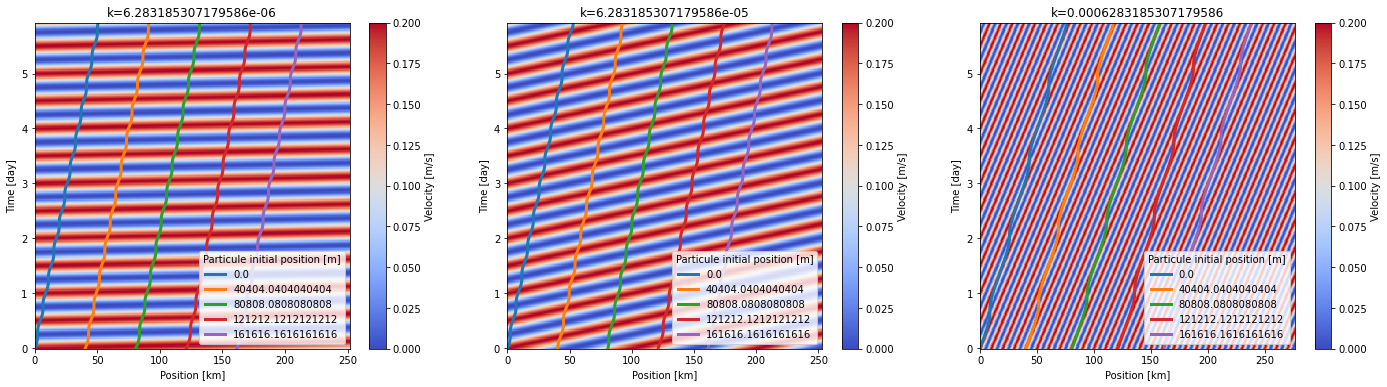

In [32]:

K=[k2/10, k2, k2*10 ]#wave length between 10 - 1000 km
l=len(K)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__k=K[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('k='+str(K[i]))

### Dependency on pulsation w

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


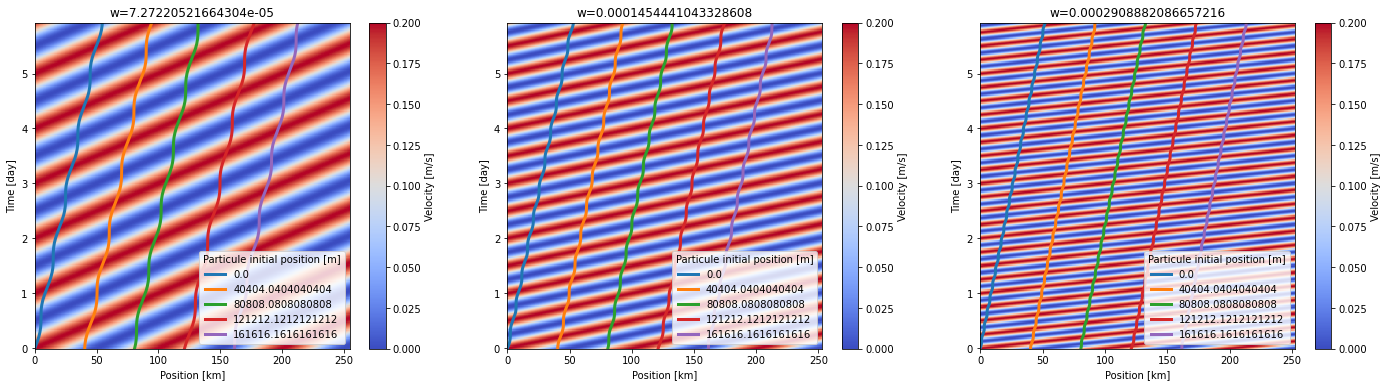

In [33]:
W=[1/2*sti.w2,1*sti.w2, 2*sti.w2]
l=len(W)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__w=W[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('w='+str(W[i]))

# Advected/Unadvected case
* isophase are $t=\frac{k}{w}x$ for unadvected case and $t=\frac{x}{(\frac{w}{k}+u_m)}$ for advected case

* if u(x,t) reaches w/k for some x or t, particules are caught in isophase for a certain time (how to get it)
* The mean  slope of trajcetories is not um. How to evaluate the mean slope ? 
* Integration error may can make trajectoiries diverge from an isophase ?

Intuition:
Unadvected case:
* um+uw > w/k > um - uw : particles caught in an isophase 
* w/k > um + uw: oscillations
* w/k < um - uw :oscillations 

Advected case: 
* |uw| > |w/k|: particles caught in an isophase 
* |w/k| > |uw|: oscillations

# Unadvected case
## Plot velocity field + trajectories + velocities + error

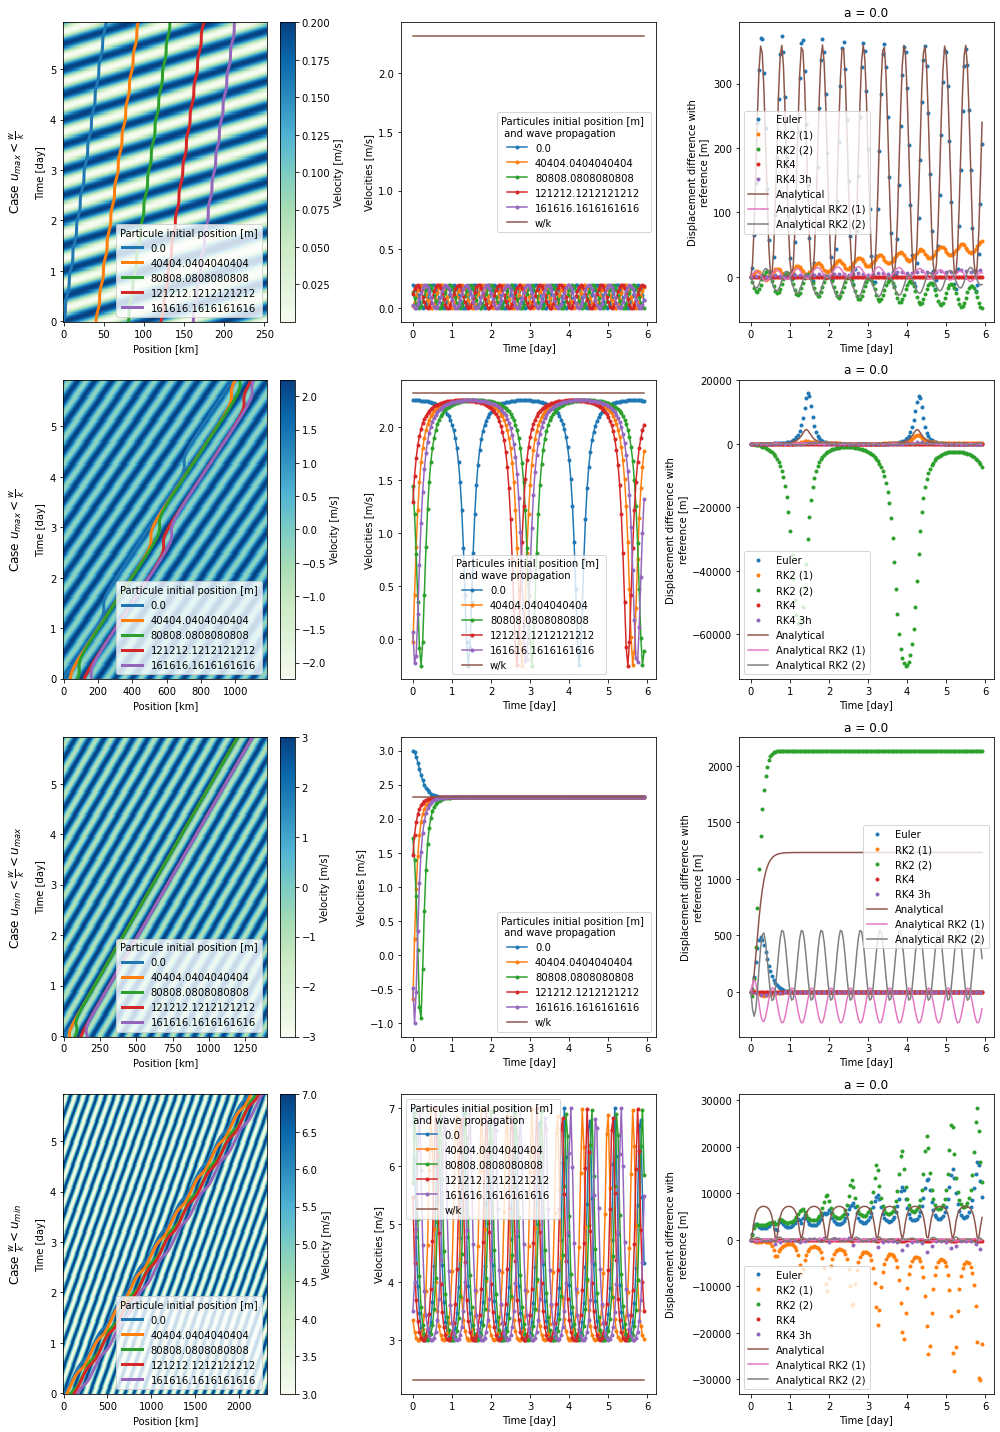

In [8]:
Um=[0.1,1,1,5]
Uw=[0.1,1.25,2,2]

l=len(Um)

fig, axes = plt.subplots(nrows=l, ncols=3, figsize=(14,20))
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta4)

R_legend=[r'Case $u_{max}<\frac{w}{k}$',r'Case $u_{max}<\frac{w}{k}$', r'Case $u_{min}<\frac{w}{k}<u_{max}$', r'Case $\frac{w}{k}<u_{min}$' ]
for i in range(l):
    y.update_parameters(velocity__um=Um[i], velocity__uw=Uw[i])
    y.velocity_field().plot(y='t', cmap='GnBu', ax=axes[i][0])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i][0],lw=3)
    ax=axes[i,0]
    ax.annotate(R_legend[i], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation='vertical')
    
    
    
    y['v'].isel(a=slice(0,None,20)).plot(x="otime_day", hue="a",marker='.',ls='-',label=y.out_ds.a.isel(a=slice(0,None,20)).values, ax=axes[i][1])
    propagation=np.ones_like(y.out_ds.otime)*y['w']/y['k']
    axes[i][1].plot(y.out_ds.otime_day, propagation, label='w/k')
    axes[i][1].legend()
    axes[i][1].get_legend().set_title("Particules initial position [m] \n and wave propagation")
    
    
    
    comp=sti.Temp_Int_Comp(y, advected=0, um=Um[i], uw=Uw[i])#, um=1, uw=0.5, advected=0) #CAUTION: add parameters if parameters add in SetUp x different than default
    LABEL=comp.ds.int_method.values
    comp.ds.diff_dis.isel(a=0,int_method=[0,1,2,3,4]).plot(x="otime_day",hue='int_method',ls='', marker='.',markersize=6, label=LABEL[:-1], ax=axes[i][2])
    
    t=y.out_ds.otime
    yp=y['p'].isel(a=0)
    y0=y['p'].isel(a=0, otime=0)
    err=y['uw']*sti.h2s/2*(np.cos(y['k']*y0)-np.cos(y['w']*t-y['k']*yp))
    err.attrs={'units':'m', "long_name":"Displacement difference with reference"}
    otime_day = err.otime/(24*3600)
    err.coords['otime_day']=otime_day
    err.otime_day.attrs={"units":"day", "long_name":"Time"}
    err.plot(x='otime_day',label='Analytical', ax=axes[i][2])

    errk2=y['uw']*y['w']*sti.h2s**2/24*(np.sin(y['w']*t-y['k']*yp)-np.sin(-y['k']*yp))
    errk2.attrs={'units':'m', "long_name":"Displacement difference with reference"}
    errk2.plot(x='otime_day', label='Analytical RK2 (1)',ax=axes[i][2])

    errk3=-y['uw']*y['w']*sti.h2s**2/12*(np.sin(y['w']*t-y['k']*yp)-np.sin(-y['k']*yp))
    errk3.attrs={'units':'m', "long_name":"Displacement difference with reference"}
    errk3.plot(x='otime_day', label='Analytical RK2 (2)',ax=axes[i][2])
    axes[i][2].legend()
    
plt.tight_layout()
plt.draw()
    

## Plot velocity fields + trajectories + velocities
English  horizontal version

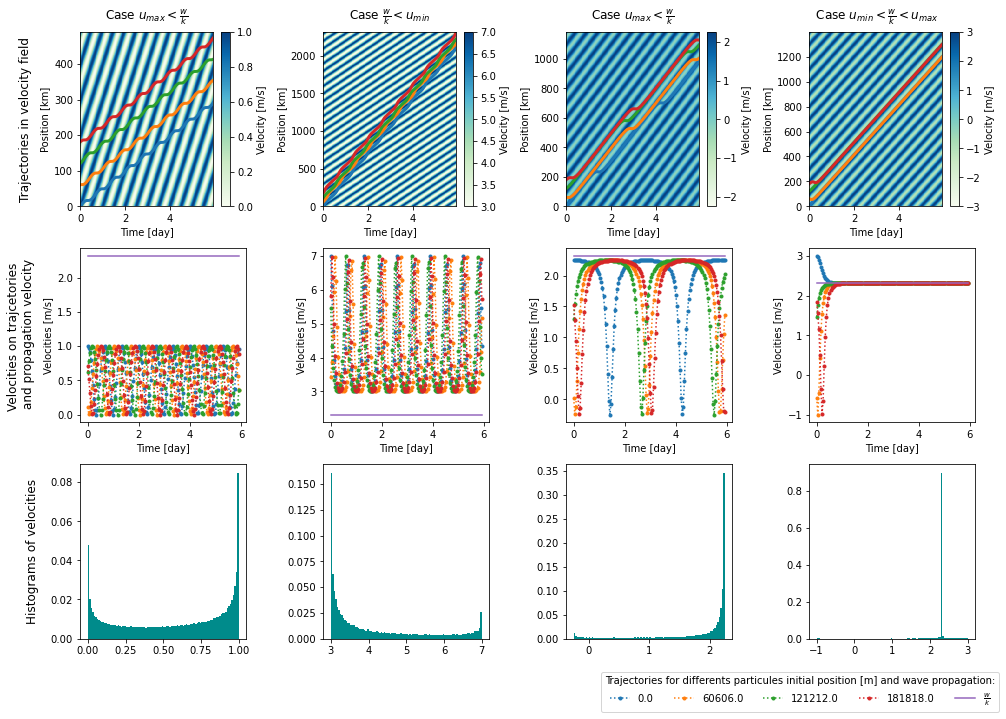

In [89]:

Um=[0.5,5,1,1]
Uw=[0.5,2,1.25,2]
l=len(Um)


fig, axes = plt.subplots(nrows=3, ncols=l, figsize=(14,10))
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta4)

C_legend=[r'Case $u_{max}<\frac{w}{k}$',  r'Case $\frac{w}{k}<u_{min}$',r'Case $u_{max}<\frac{w}{k}$', r' Case $u_{min}<\frac{w}{k}<u_{max}$' ]
R_legend=['Trajectories in velocity field', 'Velocities on trajcetories \n and propagation velocity', 'Histograms of velocities']
t=y['otime']

for i in range(l):
    y.update_parameters(velocity__um=Um[i], velocity__uw=Uw[i])
    y.velocity_field().plot(x='t', cmap='GnBu', ax=axes[0][i])
    y["p_km"].isel(a=slice(0,None,30)).plot(x='otime_day', hue='a',ax=axes[0][i],lw=3)
    propagation=np.ones_like(t)*y['w']/y['k']
    mean=y.out_ds.position_km.isel(otime=-1, a=-1).values/2
    axes[0][i].plot(propagation*t/km+mean, y.out_ds.otime_day, label='w/k',lw=3)
    axes[0][i].annotate(C_legend[i], xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')


    y['v'].isel(a=slice(0,None,30)).plot(x="otime_day", hue="a",marker='.',ls=':',label=np.around(y.out_ds.a.isel(a=slice(0,None,30)).values,0), ax=axes[1][i])
    axes[1][i].plot(y.out_ds.otime_day, propagation, label=r'$\frac{w}{k}$')
    
    hist_, bins=np.histogram(y['v'],bins=100)
    axes[2][i].bar(bins[:-1], hist_/sum(hist_), width=bins[2]-bins[1], color='darkcyan', align='edge')
    
##Only one legend for all    
lines, labels = axes[1][0].get_legend_handles_labels()
fig.legend(lines, labels, title="Trajectories for differents particules initial position [m] and wave propagation:",bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=6)
for i in range(l):
    axes[0][i].get_legend().remove()
    axes[1][i].get_legend().remove()  

    
for j in range (3):
    axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

plt.tight_layout(rect=[0,0.07,1,1])#left, bottom, right, top (default is 0,0,1,1)
plt.draw()
  

#### French version
Histograms are over all a and all times

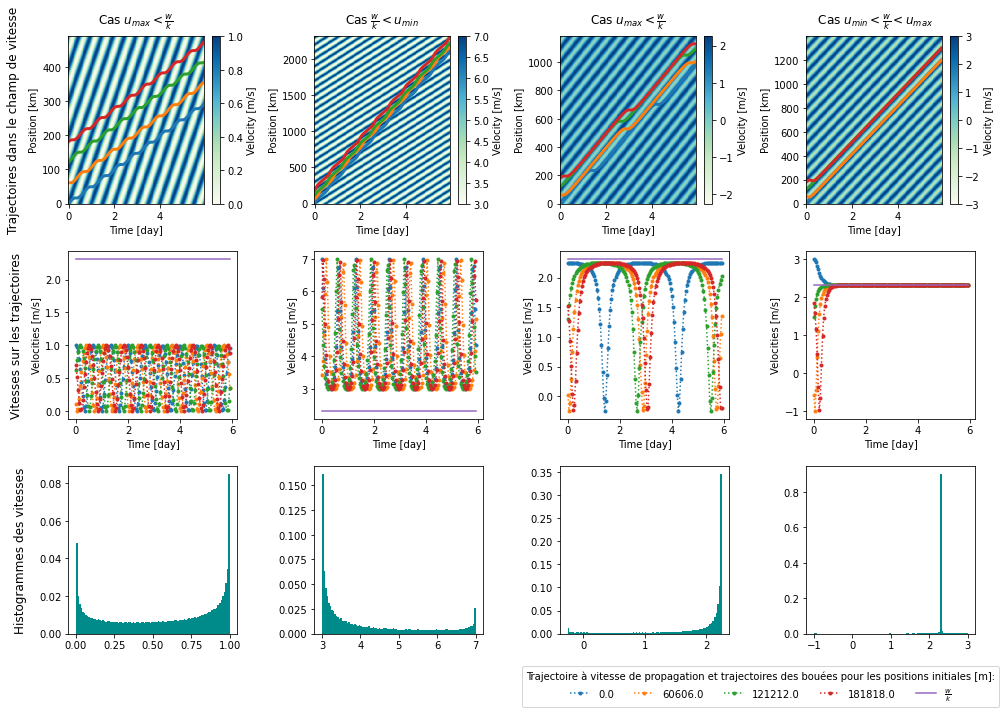

In [86]:

Um=[0.5,5,1,1]
Uw=[0.5,2,1.25,2]
l=len(Um)


fig, axes = plt.subplots(nrows=3, ncols=l, figsize=(14,10))
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta4)

C_legend=[r'Cas $u_{max}<\frac{w}{k}$',  r'Cas $\frac{w}{k}<u_{min}$',r'Cas $u_{max}<\frac{w}{k}$', r' Cas $u_{min}<\frac{w}{k}<u_{max}$' ]
R_legend=['Trajectoires dans le champ de vitesse', 'Vitesses sur les trajectoires', 'Histogrammes des vitesses']
t=y['otime']

for i in range(l):
    y.update_parameters(velocity__um=Um[i], velocity__uw=Uw[i])
    y.velocity_field().plot(x='t', cmap='GnBu', ax=axes[0][i])
    y["p_km"].isel(a=slice(0,None,30)).plot(x='otime_day', hue='a',ax=axes[0][i],lw=3)
    propagation=np.ones_like(t)*y['w']/y['k']
    mean=y.out_ds.position_km.isel(otime=-1, a=-1).values/2
    axes[0][i].plot(propagation*t/km+mean, y.out_ds.otime_day, label='w/k',lw=3)
    axes[0][i].annotate(C_legend[i], xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')


    y['v'].isel(a=slice(0,None,30)).plot(x="otime_day", hue="a",marker='.',ls=':',label=np.around(y.out_ds.a.isel(a=slice(0,None,30)).values,0), ax=axes[1][i])
    axes[1][i].plot(y.out_ds.otime_day, propagation, label=r'$\frac{w}{k}$')
    
    hist_, bins=np.histogram(y['v'],bins=100)
    axes[2][i].bar(bins[:-1], hist_/sum(hist_), width=bins[2]-bins[1], color='darkcyan', align='edge')
    
##Only one legend for all    
lines, labels = axes[1][0].get_legend_handles_labels()
fig.legend(lines, labels, title="Trajectoire à vitesse de propagation et trajectoires des bouées pour les positions initiales [m]:",bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=6)
for i in range(l):
    axes[0][i].get_legend().remove()
    axes[1][i].get_legend().remove()  

    
for j in range (3):
    axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

plt.tight_layout(rect=[0,0.07,1,1])#left, bottom, right, top (default is 0,0,1,1)
plt.draw()
  

Errors

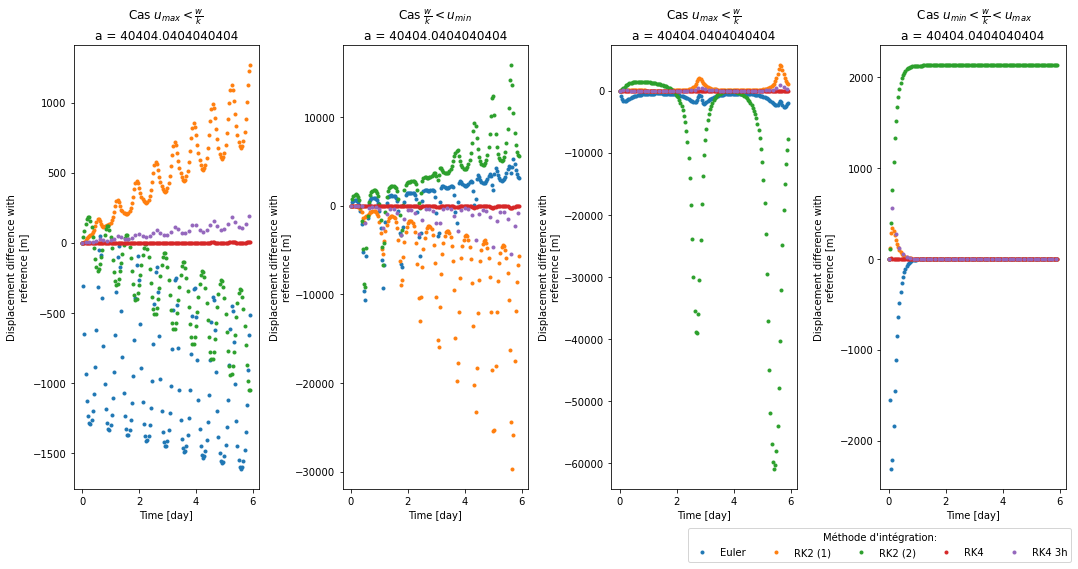

In [19]:

Um=[0.5,5,1,1]
Uw=[0.5,2,1.25,2]
l=len(Um)


fig, axes = plt.subplots(ncols=l, figsize=(15,10))
y=sti.SetUp(advected=0)
C_legend=[r'Cas $u_{max}<\frac{w}{k}$',  r'Cas $\frac{w}{k}<u_{min}$',r'Cas $u_{max}<\frac{w}{k}$', r' Cas $u_{min}<\frac{w}{k}<u_{max}$' ]
#R_legend=['Trajectoires dans le champ de vitesse', 'Vitesses sur les trajectoires', 'Histogrammes des vitesses']
t=y['otime']

for i in range(l):
    y.update_parameters(velocity__um=Um[i], velocity__uw=Uw[i])
    comp=sti.Temp_Int_Comp(y, um=Um[i], uw=Uw[i], advected=0)#, um=1, uw=0.5, advected=0) #CAUTION: add parameters if parameters add in SetUp x different than default
    comp.print_diff_dis(ax=axes[i])
    axes[i].annotate(C_legend[i], xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')

    
##Only one legend for all    
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(lines, labels, title="Méthode d'intégration:",bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=6)
for i in range(l):
    axes[i].get_legend().remove()


plt.tight_layout(rect=[0,0.05,1,0.8])#left, bottom, right, top (default is 0,0,1,1)
plt.draw()
  

# Advected case

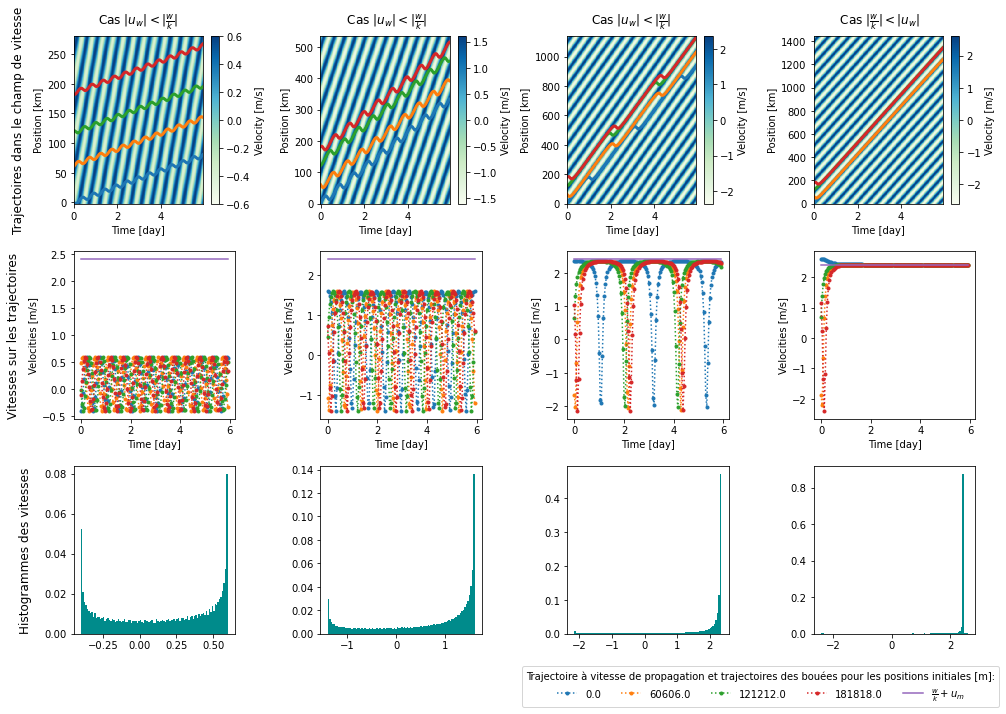

In [79]:
Uw=[-0.5,1.5,2.25,2.5]

l=len(Uw)

fig, axes = plt.subplots(nrows=3, ncols=l, figsize=(14,10))
y=sti.SetUp()
y.update_intmethod(sti.Runge_Kutta4)


C_legend=[r'Cas $|u_{w}|<|\frac{w}{k}|$',r' Cas $|u_{w}|<|\frac{w}{k}|$', r'Cas $|u_{w}|<|\frac{w}{k}| $', r' Cas $|\frac{w}{k}|<|u_{w}|$' ]
R_legend=['Trajectoires dans le champ de vitesse', 'Vitesses sur les trajectoires' ,'Histogrammes des vitesses']
t=y['otime']

for i in range(l):
    y.update_parameters( velocity__uw=Uw[i])
    y.velocity_field().plot(x='t', cmap='GnBu', ax=axes[0][i])
    y["p_km"].isel(a=slice(0,None,30)).plot(x='otime_day', hue='a',ax=axes[0][i],lw=3)
    propagation=np.ones_like(t)*y['w']/y['k']+y['um']
    mean=y.out_ds.position_km.isel(otime=-1, a=-1).values/2
    axes[0][i].plot(propagation*t/km+mean, y.out_ds.otime_day, label='w/k',lw=3)
    axes[0][i].annotate(C_legend[i], xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')


    y['v'].isel(a=slice(0,None,30)).plot(x="otime_day", hue="a",marker='.',ls=':',label=np.around(y.out_ds.a.isel(a=slice(0,None,30)).values,0), ax=axes[1][i])
    axes[1][i].plot(y.out_ds.otime_day, propagation, label=r'$\frac{w}{k}+u_m$')
    
    hist_, bins=np.histogram(y['v'],bins=100)
    axes[2][i].bar(bins[:-1], hist_/sum(hist_), width=bins[2]-bins[1], color='darkcyan', align='edge')
    
##Only one legend for all    
lines, labels = axes[1][0].get_legend_handles_labels()
fig.legend(lines, labels, title="Trajectoire à vitesse de propagation et trajectoires des bouées pour les positions initiales [m]:",bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=6)
for i in range(l):
    axes[0][i].get_legend().remove()
    axes[1][i].get_legend().remove()  

    
for j in range (3):
    axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

plt.tight_layout(rect=[0,0.07,1,1])#left, bottom, right, top (default is 0,0,1,1)
plt.draw()
  

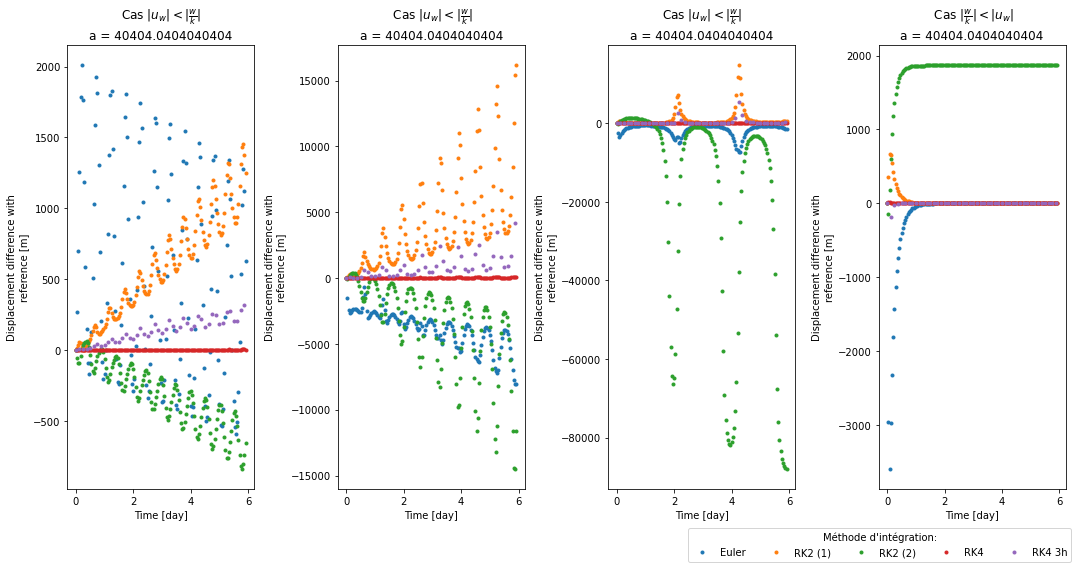

In [21]:
Uw=[-0.5,1.5,2.25,2.5]

l=len(Uw)

fig, axes = plt.subplots(ncols=l, figsize=(15,10))
y=sti.SetUp()
C_legend=[r'Cas $|u_{w}|<|\frac{w}{k}|$',r' Cas $|u_{w}|<|\frac{w}{k}|$', r'Cas $|u_{w}|<|\frac{w}{k}| $', r' Cas $|\frac{w}{k}|<|u_{w}|$' ]
#R_legend=['Trajectoires dans le champ de vitesse', 'Vitesses sur les trajectoires', 'Histogrammes des vitesses']
t=y['otime']

for i in range(l):
    y.update_parameters( velocity__uw=Uw[i])
    comp=sti.Temp_Int_Comp(y, uw=Uw[i])#, um=1, uw=0.5, advected=0) #CAUTION: add parameters if parameters add in SetUp x different than default
    comp.print_diff_dis(ax=axes[i])
    axes[i].annotate(C_legend[i], xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')

    
##Only one legend for all    
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(lines, labels, title="Méthode d'intégration:",bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=6)
for i in range(l):
    axes[i].get_legend().remove()


plt.tight_layout(rect=[0,0.05,1,0.8])#left, bottom, right, top (default is 0,0,1,1)
plt.draw()
  